# ANHA4 simulation results

* Spin-up 6 years (2002-2004)*2
* ANHA4-EXH001
* 2002/01/01 - 2013/12/31 (144 months)
* Latest riverine tracer source file

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
import cartopy.feature
import cartopy.crs as ccrs # ccrs
#import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran
SB=[0.06, 0.05, 0.03]    # Smokey Black
AFB = [0.36, 0.54, 0.66] # Air Force Blue
AG = [0.55, 0.71, 0.0]   # Apple Green
AZ = [0.0, 0.5, 1.0]     # Azure
CB = [0.37, 0.62, 0.63]  # Cadet blue
SP = [1.0, 0.72, 0.77]   # Sakura
CamB = [0.64, 0.76, 0.68]# Cambridge blue
DC = [0.0, 0.55, 0.55]   # Dark cyan
DE = [0.08, 0.38, 0.74]  # Denim
BB = [0.54, 0.81, 0.94]  # Baby blue

In [4]:
Mon = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [5]:
def seasonal_cycle(data):
    out = np.empty([12, np.size(data, 1), np.size(data, 2)])
    for mon in range(12):
        out[mon, :, :] = np.nanmean(data[mon:len(data):12, :, :], 0)
    return out
def seasonal_decomp3d(data):
    anom = np.empty(data.shape)
    for mon in range(12):
        temp_data = np.nanmean(data[mon:len(data):12, :, :], 0)
        anom[mon:len(data):12, :, :] = data[mon:len(data):12, :, :]-temp_data
    return anom

In [6]:
#MAT = scipy.io.loadmat('_data/Exchange/AO_inds.mat')
#upper_ind = MAT['upper_index'][:]
#lower_ind = MAT['lower_index'][:]
#AO_index = MAT['AO_index'][:]

In [7]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/SPIN06_SET02_1m_20020101_20131231_ptrc_T.nc'

In [8]:
ptrc_obj = nc.Dataset(FName)
Ba = np.squeeze(ptrc_obj.variables['Ba'][:, 0, :, :])
d18O = np.squeeze(ptrc_obj.variables['d18O'][:, 0, :, :])
nav_lat = ptrc_obj.variables['nav_lat'][:]
nav_lon = ptrc_obj.variables['nav_lon'][:]
deptht = ptrc_obj.variables['deptht'][:]

In [9]:
FS_Ba = Ba[:, 520, 325]
BS_Ba = Ba[:, 780, 231]
MK_Ba = Ba[:, 708, 149]
LN_Ba = Ba[:, 730, 390]
Ob_Ba = Ba[:, 617, 448]
CA_Ba = Ba[:, 680, 250]
CAA_Ba = Ba[:, 610, 150]

FS_d18O = d18O[:, 520, 325]
BS_d18O = d18O[:, 780, 231]
MK_d18O = d18O[:, 708, 149]
LN_d18O = d18O[:, 730, 390]
Ob_d18O = d18O[:, 617, 448]
CA_d18O = d18O[:, 680, 250]
CAA_d18O = d18O[:, 610, 150]

In [10]:
d18O[Ba==0]=np.nan
Ba[Ba==0]=np.nan;
d18O_anom = seasonal_decomp3d(d18O)
d18O_monmean = seasonal_cycle(d18O)
Ba_anom = seasonal_decomp3d(Ba)
Ba_monmean = seasonal_cycle(Ba)

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [11]:
#upper_Ba = Ba_anom[np.squeeze(upper_ind), :, :]
#lower_Ba = Ba_anom[np.squeeze(lower_ind), :, :]

In [12]:
#mean_upper_Ba = np.nanmean(upper_Ba, 0)
#mean_lower_Ba = np.nanmean(lower_Ba, 0)

In [13]:
from dateutil.relativedelta import relativedelta

base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

# Mean timeseries

In [14]:
lev1 = np.arange(35, 95, 5)
lev2 = [-3.25, -2.25, -1.25, -0.25, 0.25, 1.25, 2.25, 3.25]

In [15]:
def draw_Ba(nav_lon, nav_lat, Ba, lev, ax, cmap=cm.GMT_haxby_r):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.contourf(x, y, Ba, lev, cmap=cmap, extend='both')
    proj.contour(x, y, Ba, lev, linewidths=0.5, colors=('gray',))
    return CS

In [16]:
Ba_t = np.nanmean(np.nanmean(Ba, 1), 1)
d18O_t = np.nanmean(np.nanmean(d18O, 1), 1)

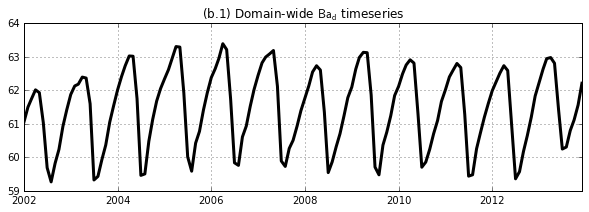

In [76]:
fig = plt.figure(figsize=(10, 3))
ax = fig.gca()
ax.grid()
ax.plot(date_list, Ba_t, 'k-', lw=3, label='');
ax.set_ylim([59, 64]); ax.set_yticks(range(59, 65))
ax.set_title('(b.1) Domain-wide $\mathsf{Ba_d}$ timeseries')
fig.savefig('_publish/FIG10_1.pdf', dpi=400, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

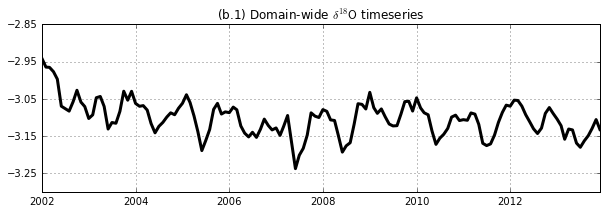

In [77]:
fig = plt.figure(figsize=(10, 3))
ax = fig.gca()
ax.grid()
ax.plot(date_list, d18O_t, 'k-', lw=3, label='');
ax.set_ylim([-3.3, -2.85]); ax.set_yticks(np.arange(-3.25, -2.75, 0.1));
ax.set_title('(b.1) Domain-wide $\mathsf{\delta^{18}O}$ timeseries')
fig.savefig('_publish/FIG10_2.pdf', dpi=400, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

In [19]:
import matplotlib.patches as mpatches

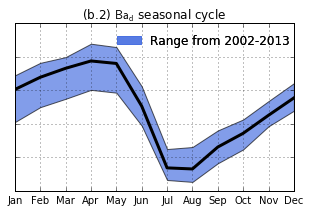

In [78]:
Ba_stack = np.reshape(Ba_t, [12, 12])
Ba_stack_min = np.min(Ba_stack, 0)
Ba_stack_mean = np.mean(Ba_stack, 0)
Ba_stack_max = np.max(Ba_stack, 0)
fake_x = range(1, 13)

fig = plt.figure(figsize=(5, 3)); ax = fig.gca(); ax.grid()
ax.fill_between(fake_x, Ba_stack_min, Ba_stack_max, facecolor=RB, edgecolor=None, interpolate=True, alpha=0.65)
ax.plot(fake_x, Ba_stack_mean, color='k', lw=3, label='Average') 
ax.set_xlim([1, 12]); ax.set_xticks(fake_x); ax.set_xticklabels(Mon)
ax.set_ylim([59, 64]); ax.set_yticks(range(59, 65)); ax.yaxis.set_ticklabels([])

patch = mpatches.Patch(color=RB, alpha=0.65, label="Range from 2002-2013")
legend_handle = plt.legend(handles=[patch], bbox_to_anchor=(1.025, 1), frameon=False)
#LG = ax.legend(numpoints=1, bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
fig.gca().add_artist(legend_handle)
ax.set_title('(b.2) $\mathsf{Ba_d}$ seasonal cycle')

fig.savefig('_publish/FIG10_3.pdf', dpi=400, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

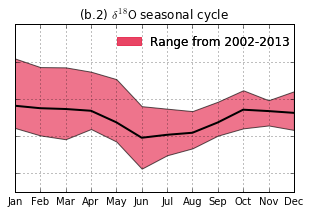

In [79]:
d18O_stack = np.reshape(d18O_t, [12, 12])
d18O_stack_min = np.min(d18O_stack, 0)
d18O_stack_mean = np.mean(d18O_stack, 0)
d18O_stack_max = np.max(d18O_stack, 0)
fake_x = range(1, 13)

fig = plt.figure(figsize=(5, 3)); ax = fig.gca(); ax.grid()
ax.fill_between(fake_x, d18O_stack_min, d18O_stack_max, facecolor=AM, edgecolor=None, interpolate=True, alpha=0.65)
ax.plot(fake_x, d18O_stack_mean, color='k', lw=2, label='Mean surface $\mathsf{\delta^{18}O}$ seasonal cycle') 
ax.set_xlim([1, 12]); ax.set_xticks(fake_x); ax.set_xticklabels(Mon)
ax.set_ylim([-3.3, -2.85]); ax.set_yticks(np.arange(-3.25, -2.75, 0.1)); ax.yaxis.set_ticklabels([])

patch = mpatches.Patch(color=AM, alpha=0.65, label="Range from 2002-2013")
legend_handle = plt.legend(handles=[patch], bbox_to_anchor=(1.025, 1), frameon=False)
#LG = ax.legend(numpoints=1, bbox_to_anchor=(0, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
fig.gca().add_artist(legend_handle)
ax.set_title('(b.2) $\mathsf{\delta^{18}O}$ seasonal cycle')
fig.savefig('_publish/FIG10_4.pdf', dpi=400, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

In [22]:
#fig = plt.figure(figsize=(12, 8))
#ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
#ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
#ax1.grid(); ax2.grid()
#ax1.plot(date_list, np.nanmean(np.nanmean(Ba_anom, 1), 1), 'k-', lw=3)
#ax2.plot(date_list, np.nanmean(np.nanmean(d18O_anom, 1), 1), 'k-', lw=3)
##ax.plot(x, y0, 'k--', lw=2)
#ax1.set_title('mean surface Ba anom in the whole domain')
#ax2.set_title('mean surface d18O anom in the whole domain')

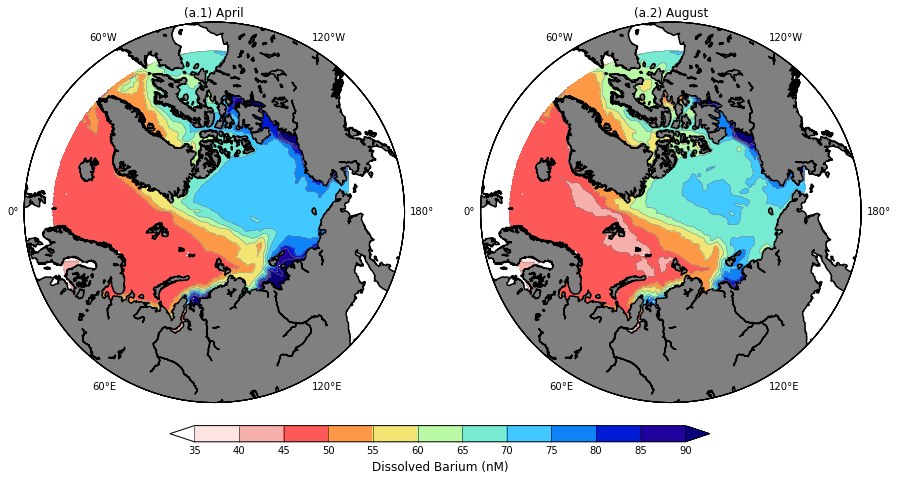

In [51]:
fig=plt.figure(figsize=(15, 15));

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
#ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba_monmean[3, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
proj.contour(x, y, Ba_monmean[3, :, :], lev1, linewidths=0.5, colors=('gray',))
ax1.set_title('(a.1) April')
ax2.set_title('(a.2) August')

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax2)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba_monmean[7, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
proj.contour(x, y, Ba_monmean[7, :, :], lev1, linewidths=0.5, colors=('gray',))

cax = fig.add_axes([0.26, 0.3, 0.5, 0.015])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Dissolved Barium (nM)', fontsize=12)
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev1)

fig.savefig('_publish/FIG11.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

In [28]:
from __future__ import unicode_literals

In [67]:
lev2 = [-6, -4.5, -3, -1.5, 0, 1.5, 3, 4.5, 6]

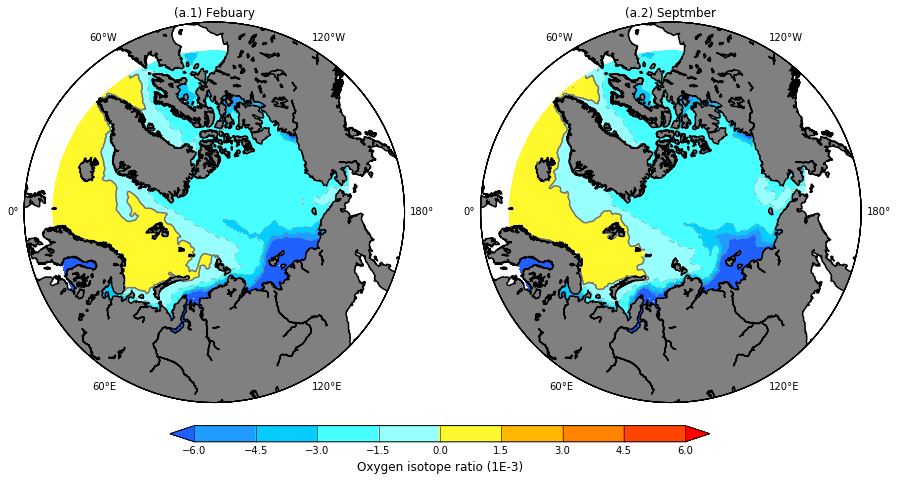

In [75]:
fig=plt.figure(figsize=(15, 15));

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
#ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, d18O_monmean[2, :, :], lev2, cmap=cm.GMT_no_green, extend='both')
proj.contour(x, y, d18O_monmean[2, :, :], lev2, linewidths=0.5, colors=('gray',))
proj.contour(x, y, d18O_monmean[2, :, :], [0], linewidths=1.5, colors=([0.45, 0.45, 0.45],))


ax1.set_title('(a.1) Febuary')
ax2.set_title('(a.2) Septmber')

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax2)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, d18O_monmean[8, :, :], lev2, cmap=cm.GMT_no_green, extend='both')
proj.contour(x, y, d18O_monmean[8, :, :], lev2, linewidths=0.5, colors=('gray',))
proj.contour(x, y, d18O_monmean[8, :, :], [0],  linewidths=1.5, colors=([0.45, 0.45, 0.45],))

cax = fig.add_axes([0.26, 0.3, 0.5, 0.015])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Oxygen isotope ratio (1E-3)', fontsize=12) # 
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev2)

fig.savefig('_publish/FIG12.pdf', dpi=600, orientation='portrait', papertype='a4', format='pdf',
                bbox_inches='tight', pad_inches=0.1)

# Variations at key locations

In [18]:
Ba_mean = np.nanmean(Ba, 0)
d18O_mean = np.nanmean(d18O, 0)

In [19]:
locx = [520, 780, 708, 730, 617, 680, 610]
locy = [325, 231, 149, 390, 448, 250, 150]
syms = ['yx', 'y^', 'y*', 'y+', 'y<', 'y>', 'yv']
labels = ['Fram Strait', 'Bering Strait', 'Mackenzie', 'Lena', 'Ob', 'Central Arctic', 'CAA']

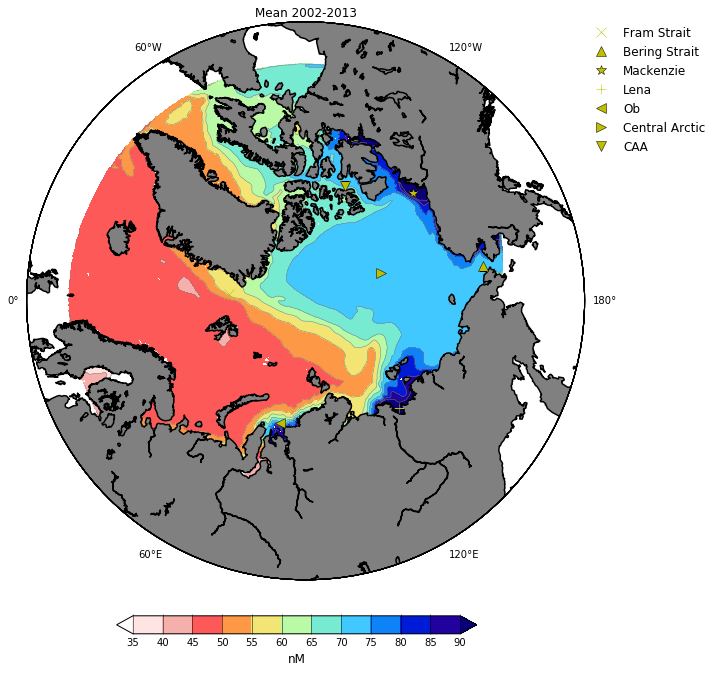

In [20]:
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba_mean, lev1, cmap=cm.GMT_haxby_r, extend='both')
proj.contour(x, y, Ba_mean, lev1, linewidths=0.5, colors=('gray',))
for i in range(7):
    proj.plot(x[locx[i], locy[i]], y[locx[i], locy[i]], syms[i], ms=10, label=labels[i])
ax.set_title('Mean 2002-2013', fontsize=12)
LG = ax.legend(numpoints=1, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)

cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=20)
CBar.set_ticks(lev1)

fig.savefig('seminar9.1.png', dpi=300, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

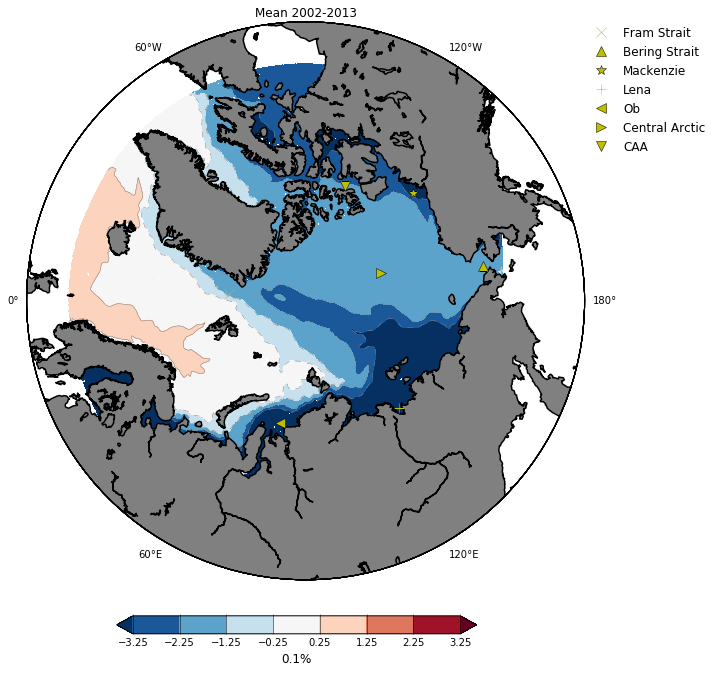

In [21]:
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, d18O_mean, lev2, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, d18O_mean, lev2, linewidths=0.5, colors=('gray',))
for i in range(7):
    proj.plot(x[locx[i], locy[i]], y[locx[i], locy[i]], syms[i], ms=10, label=labels[i])
ax.set_title('Mean 2002-2013', fontsize=12)
LG = ax.legend(numpoints=1, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)

cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('0.1%', fontsize=12)
CBar.ax.tick_params(axis='x', length=20)
CBar.set_ticks(lev2)

fig.savefig('seminar9.2.png', dpi=300, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

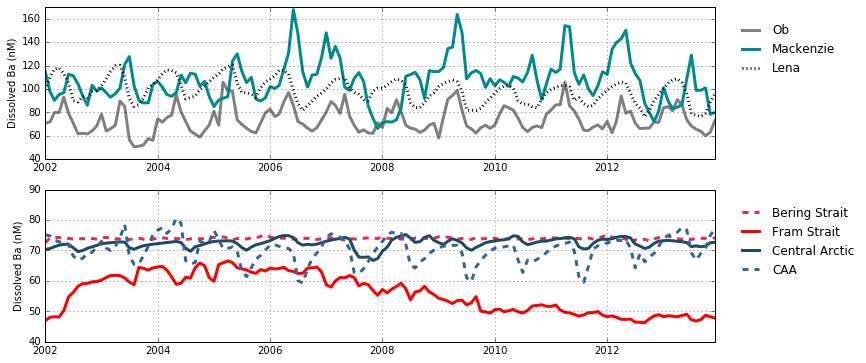

In [22]:
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
ax1.grid(); ax2.grid()

ax1.plot(date_list, Ob_Ba, 'k-', color='gray', lw=3, label='Ob')
ax1.plot(date_list, MK_Ba, 'k-', color=DC, lw=3, label='Mackenzie')
ax1.plot(date_list, LN_Ba, 'k:', lw=3, label='Lena')
ax1.set_ylim(40, 170)
ax1.set_ylabel('Dissolved Ba (nM)')
LG=ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 

ax2.plot(date_list, BS_Ba, 'k--', color=AM, lw=3, label='Bering Strait')
ax2.plot(date_list, FS_Ba, 'k-', color='r', lw=3, label='Fram Strait')
ax2.plot(date_list, CA_Ba, 'k-', color=[0.1, 0.3, 0.4], lw=3, label='Central Arctic')
ax2.plot(date_list, CAA_Ba, 'k--', color=[0.2, 0.4, 0.6], lw=3, label='CAA')
ax2.set_ylim(40, 90)
ax2.set_ylabel('Dissolved Ba (nM)')
LG=ax2.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1); LG.draw_frame(False)

fig.savefig('seminar9.3.png', dpi=300, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

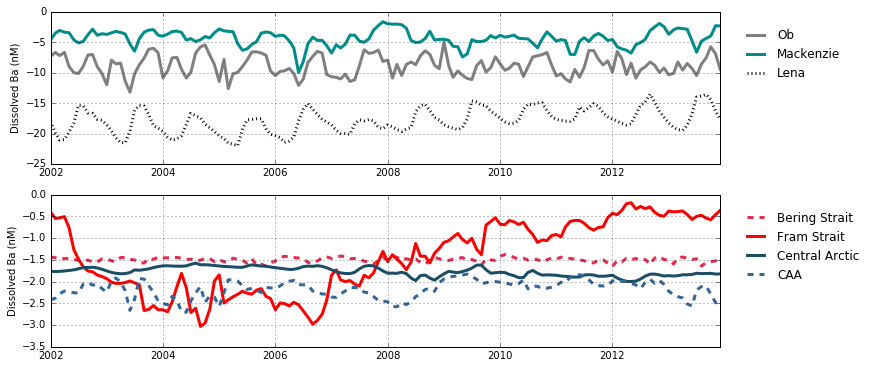

In [23]:
fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
ax1.grid(); ax2.grid()

ax1.plot(date_list, Ob_d18O, 'k-', color='gray', lw=3, label='Ob')
ax1.plot(date_list, MK_d18O, 'k-', color=DC, lw=3, label='Mackenzie')
ax1.plot(date_list, LN_d18O, 'k:', lw=3, label='Lena')
ax1.set_ylim(-25, 0)
ax1.set_ylabel('Dissolved Ba (nM)')
LG=ax1.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 

ax2.plot(date_list, BS_d18O, 'k--', color=AM, lw=3, label='Bering Strait')
ax2.plot(date_list, FS_d18O, 'k-', color='r', lw=3, label='Fram Strait')
ax2.plot(date_list, CA_d18O, 'k-', color=[0.1, 0.3, 0.4], lw=3, label='Central Arctic')
ax2.plot(date_list, CAA_d18O, 'k--', color=[0.2, 0.4, 0.6], lw=3, label='CAA')
ax2.set_ylim(-3.5, 0)
ax2.set_ylabel('Dissolved Ba (nM)')
LG=ax2.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=1); LG.draw_frame(False)

fig.savefig('seminar9.4.png', dpi=300, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

# The mean picture of each month

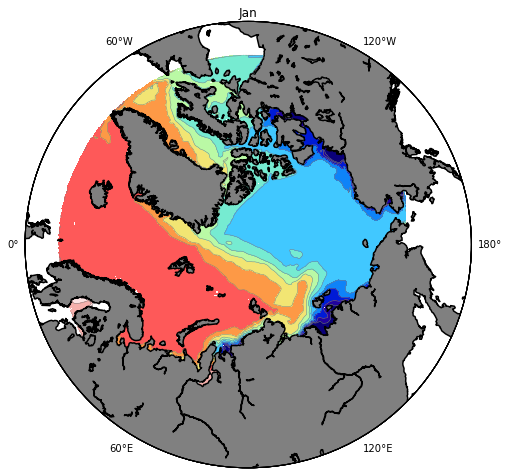

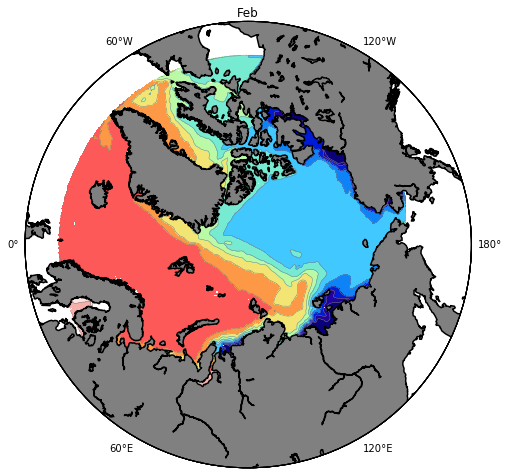

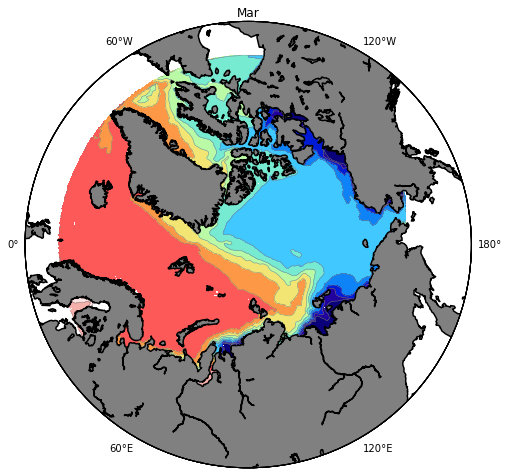

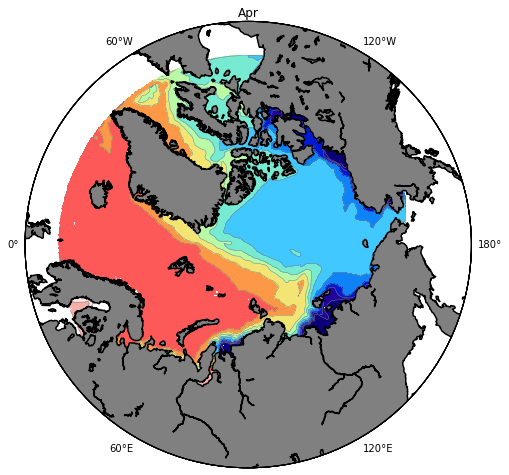

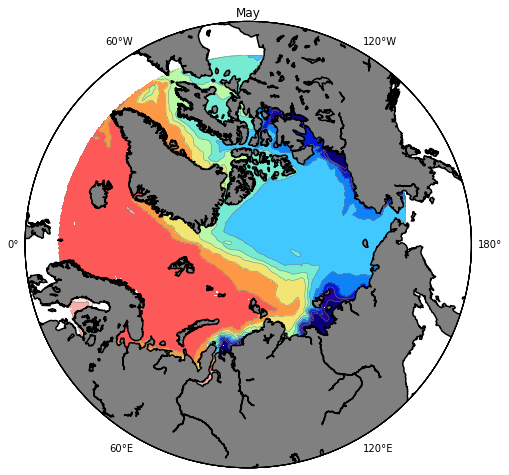

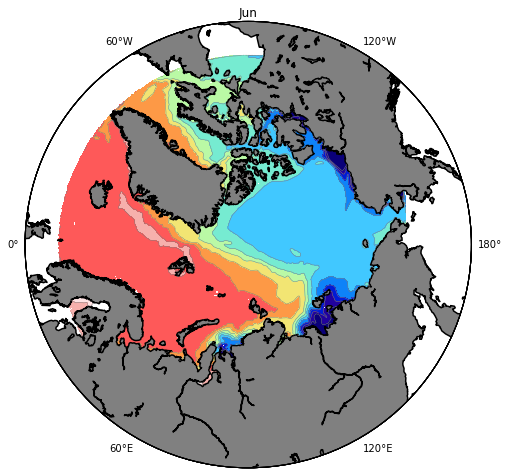

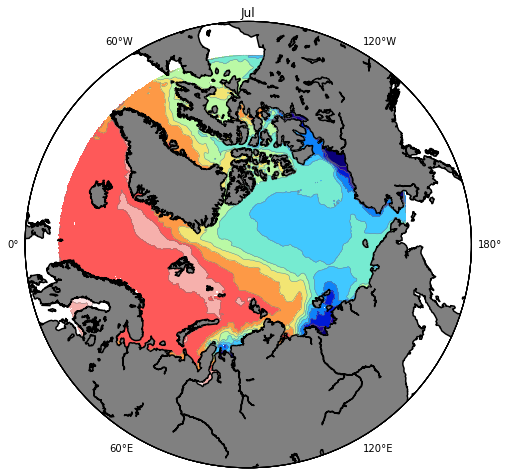

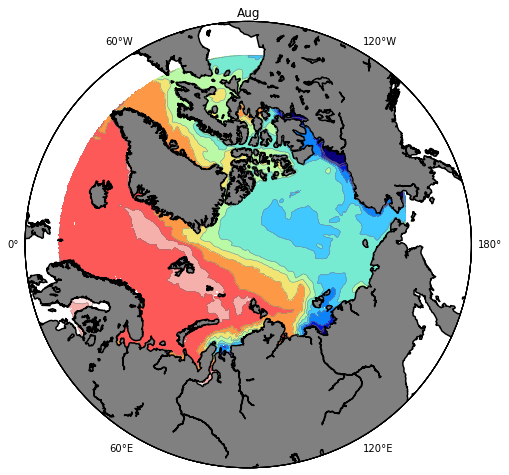

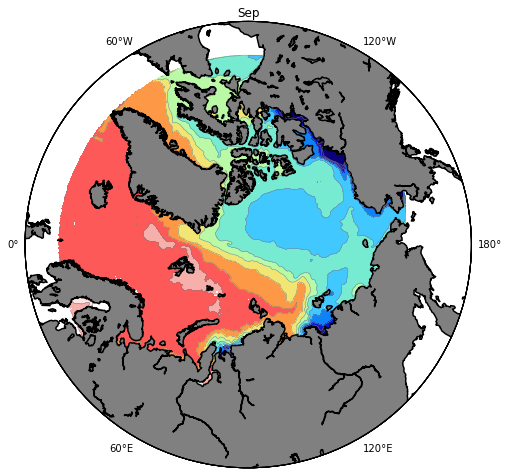

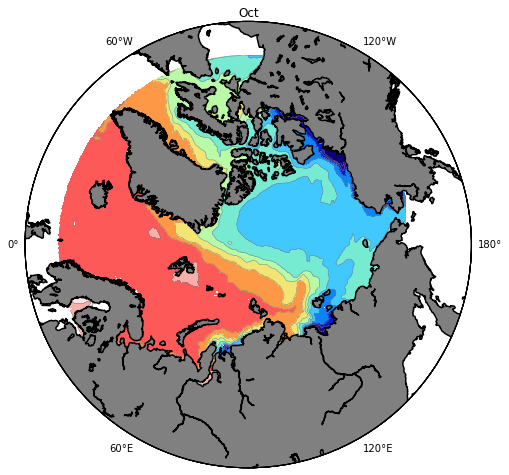

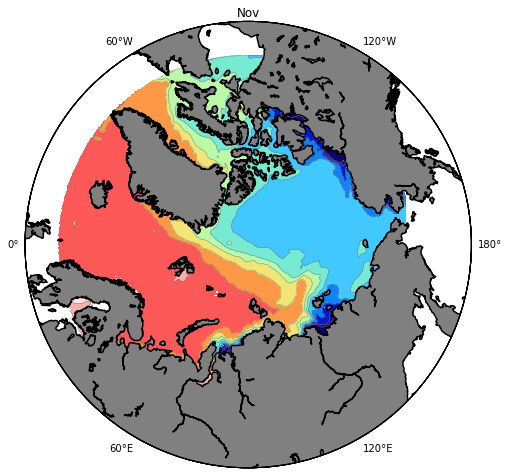

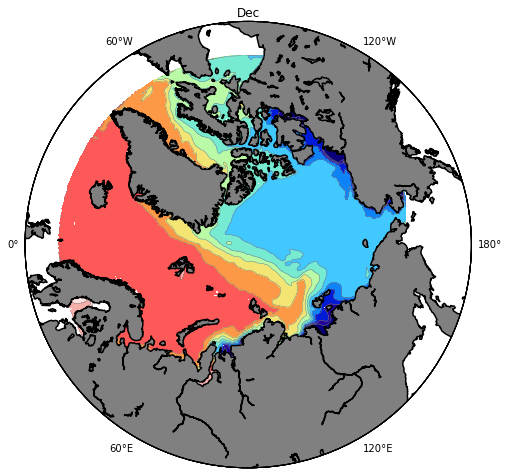

In [125]:
mon_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i in range(12):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    CS = draw_Ba(nav_lon, nav_lat, Ba_monmean[i, :, :], lev1, ax)
    ax.set_title(mon_name[i])